In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from haversine import haversine, Unit

# Cargar el dataset usando pandas
data = pd.read_csv('df_combinado_reestructurado.csv')

# Separar las entradas (X) y las salidas (y)
X = data.iloc[:, 2:].values  # Las entradas son todas las columnas excepto las dos primeras
y = data.iloc[:, :2].values  # Las salidas son las dos primeras columnas

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=50)  # Ajusta el número de componentes principales según el rendimiento
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Definir el modelo con menos entradas y regularización
model = Sequential()
model.add(Dense(512, input_dim=X_train_pca.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dense(y_train.shape[1], activation='linear'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Ajustar el modelo
history = model.fit(X_train_pca, y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo
loss = model.evaluate(X_test_pca, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Hacer predicciones
predictions = model.predict(X_test_pca)

# Calcular la distancia de Haversine media
distances = []
for i in range(len(y_test)):
    real_coord = (y_test[i, 0], y_test[i, 1])
    pred_coord = (predictions[i, 0], predictions[i, 1])
    distance = haversine(real_coord, pred_coord, unit=Unit.KILOMETERS)
    distances.append(distance)

mean_distance = np.mean(distances)
print(f'Distancia de Haversine media: {mean_distance:.4f} km')

# Calcular los percentiles 50 y 90
p50 = np.percentile(distances, 50)
p90 = np.percentile(distances, 90)

# Graficar el ECDF de las distancias
sns.ecdfplot(distances)
plt.axvline(p50, color='red', linestyle='--', linewidth=2, label='Percentil 50 (mediana)')
plt.axvline(p90, color='green', linestyle='--', linewidth=2, label='Percentil 90')
plt.xlabel('Distancia de Haversine (km)')
plt.ylabel('ECDF')
plt.title('Función de Distribución Empírica Acumulada de las Distancias de Haversine')
plt.legend()
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.legend()
plt.show()





Epoch 1/1000


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1380.8059 - val_loss: 486.6312
Epoch 2/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 436.9395 - val_loss: 206.5046
Epoch 3/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 221.0970 - val_loss: 118.8909
Epoch 4/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 154.5652 - val_loss: 71.6605
Epoch 5/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90.4342 - val_loss: 52.3970
Epoch 6/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.3646 - val_loss: 43.1073
Epoch 7/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.8059 - val_loss: 40.2651
Epoch 8/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.4433 - val_loss: 36.3314
Epoch 9/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.5206 - val_loss: 34.1055
Epoch 10/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.5206 - val_loss: 32.2109
Epoch 11/1000
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.4556 - val_loss: 30.6708
Epoch 12/1000
84/84 ━━━━━━━━━━━━━━━

In [10]:


# Función para calcular la distancia Haversine en kilómetros
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en kilómetros
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Cargar y preparar los datos
df = pd.read_csv('df_combinado_reestructurado.csv')

# Las primeras dos columnas son las salidas (latitud y longitud)
y = df.iloc[:, :2].values

# Todas las columnas restantes son las entradas
X = df.iloc[:, 2:].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con el modelo
predictions = model.predict(X_test)

# Calcular la distancia Haversine para cada par de coordenadas
distances_km = np.array([haversine(y_test[i, 0], y_test[i, 1], predictions[i, 0], predictions[i, 1]) for i in range(len(y_test))])

# Identificar los índices de las 5 mejores predicciones (menor distancia de Haversine)
best_indices = distances_km.argsort()[:5]

# Mostrar por pantalla las ubicaciones reales y predichas seleccionadas
print("Ubicaciones reales y predichas seleccionadas:")
for i, idx in enumerate(best_indices):
    real_coord = (y_test[idx, 0], y_test[idx, 1])
    pred_coord = (predictions[idx, 0], predictions[idx, 1])
    print(f"{i+1}: Real: {real_coord} | Predicción: {pred_coord}")



Ubicaciones reales y predichas seleccionadas:
1: Real: (26.239, 50.642) | Predicción: (26.238909999999997, 50.642010000000006)
2: Real: (26.266, 50.605) | Predicción: (26.266110000000012, 50.60499000000001)
3: Real: (26.226, 50.647) | Predicción: (26.225880000000004, 50.647030000000015)
4: Real: (26.259, 50.626) | Predicción: (26.259120000000003, 50.62594)
5: Real: (26.231, 50.654) | Predicción: (26.231040000000007, 50.653859999999995)


In [14]:
import folium

# Coordenadas centrales para el mapa
center_coordinates = [26.245, 50.64]

# Crear el mapa
m = folium.Map(location=center_coordinates, zoom_start=13)

# Datos de las ubicaciones reales y predichas
real_points = [(26.239, 50.642), (26.266, 50.605), (26.226, 50.647), (26.259, 50.626), (26.231, 50.654)]
predicted_points = [
    (26.23891, 50.64201),
    (26.26611, 50.60499),
    (26.22588, 50.64703),
    (26.25912, 50.62594),
    (26.23104, 50.65386)
]

# Colores para cada par de puntos real-predicho
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Añadir los puntos reales y predichos al mapa
for i, (real, predicted) in enumerate(zip(real_points, predicted_points)):
    folium.Marker(
        location=real,
        popup=f"Real {i+1}",
        icon=folium.Icon(color='white', icon_color=colors[i], icon='circle', prefix='fa')
    ).add_to(m)
    
    folium.Marker(
        location=predicted,
        popup=f"Predicción {i+1}",
        icon=folium.Icon(color=colors[i], icon='times', prefix='fa')
    ).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('mapa_ubicaciones.html')

# Mostrar el mapa en el notebook (si estás utilizando Jupyter)
m


Ubicaciones reales y predichas seleccionadas:
1: Real: (26.239, 50.642) | Predicción: (26.238909999999997, 50.642010000000006)
2: Real: (26.266, 50.605) | Predicción: (26.266110000000012, 50.60499000000001)
3: Real: (26.226, 50.647) | Predicción: (26.225880000000004, 50.647030000000015)
4: Real: (26.259, 50.626) | Predicción: (26.259120000000003, 50.62594)
5: Real: (26.231, 50.654) | Predicción: (26.231040000000007, 50.653859999999995)


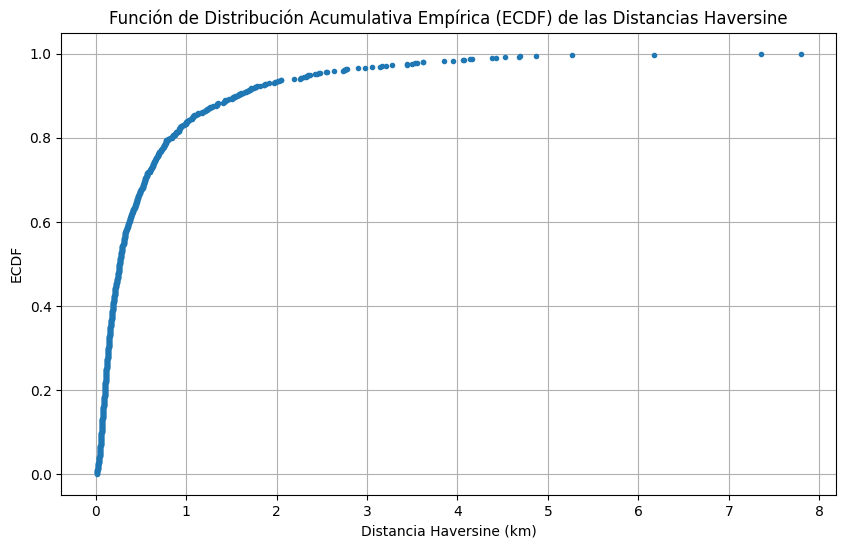

In [15]:


# Función para calcular la distancia Haversine en kilómetros
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en kilómetros
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Cargar y preparar los datos
df = pd.read_csv('df_combinado_reestructurado.csv')

# Las primeras dos columnas son las salidas (latitud y longitud)
y = df.iloc[:, :2].values

# Todas las columnas restantes son las entradas
X = df.iloc[:, 2:].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con el modelo
predictions = model.predict(X_test)

# Calcular la distancia Haversine para cada par de coordenadas
distances_km = np.array([haversine(y_test[i, 0], y_test[i, 1], predictions[i, 0], predictions[i, 1]) for i in range(len(y_test))])

# Identificar los índices de las 5 mejores predicciones (menor distancia de Haversine)
best_indices = distances_km.argsort()[:5]

# Mostrar por pantalla las ubicaciones reales y predichas seleccionadas
print("Ubicaciones reales y predichas seleccionadas:")
for i, idx in enumerate(best_indices):
    real_coord = (y_test[idx, 0], y_test[idx, 1])
    pred_coord = (predictions[idx, 0], predictions[idx, 1])
    print(f"{i+1}: Real: {real_coord} | Predicción: {pred_coord}")

# Calcular la función de distribución acumulativa empírica (ECDF)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Obtener los datos para la ECDF
x, y = ecdf(distances_km)

# Crear el gráfico de la ECDF
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Distancia Haversine (km)')
plt.ylabel('ECDF')
plt.title('Función de Distribución Acumulativa Empírica (ECDF) de las Distancias Haversine')
plt.grid(True)
plt.show()


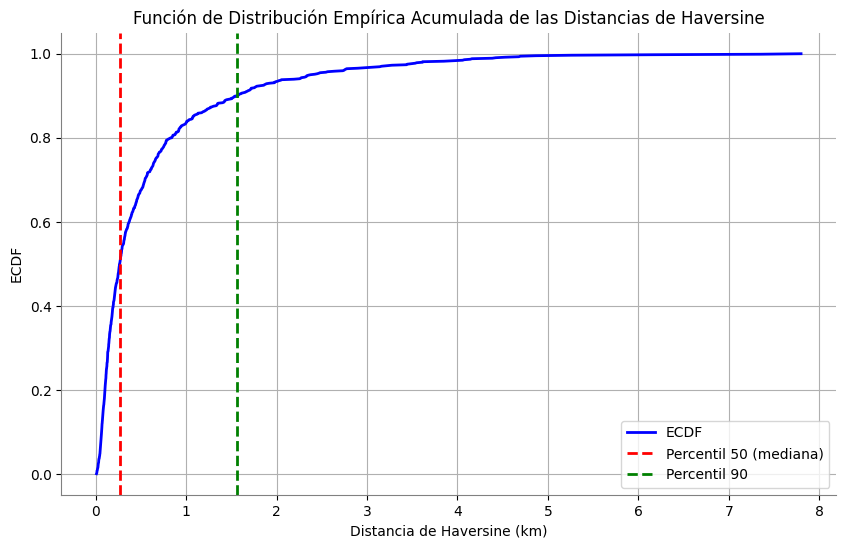

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Función para calcular la distancia Haversine en kilómetros
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radio de la Tierra en kilómetros
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Cargar y preparar los datos
df = pd.read_csv('df_combinado_reestructurado.csv')

# Las primeras dos columnas son las salidas (latitud y longitud)
y = df.iloc[:, :2].values

# Todas las columnas restantes son las entradas
X = df.iloc[:, 2:].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características de entrada
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con el modelo
predictions = model.predict(X_test)

# Calcular la distancia Haversine para cada par de coordenadas
distances_km = np.array([haversine(y_test[i, 0], y_test[i, 1], predictions[i, 0], predictions[i, 1]) for i in range(len(y_test))])

# Calcular la función de distribución acumulativa empírica (ECDF)
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Obtener los datos para la ECDF
x, y = ecdf(distances_km)

# Calcular el percentil 50 y 90 de las distancias Haversine
p50 = np.percentile(distances_km, 50)
p90 = np.percentile(distances_km, 90)

# Crear el gráfico de la ECDF con línea continua y fondo blanco
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='', linestyle='-', color='blue', linewidth=2, label='ECDF')

# Añadir líneas verticales para los percentiles 50 y 90
plt.axvline(p50, color='red', linestyle='--', linewidth=2, label='Percentil 50 (mediana)')
plt.axvline(p90, color='green', linestyle='--', linewidth=2, label='Percentil 90')

# Etiquetas y título
plt.xlabel('Distancia de Haversine (km)')
plt.ylabel('ECDF')
plt.title('Función de Distribución Empírica Acumulada de las Distancias de Haversine')
plt.grid(True)

# Establecer el fondo en blanco
plt.gca().set_facecolor('white')

# Añadir bordes más visibles
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

